In [34]:
import pandas as pd # import the Pandas Library

df1 = pd.read_csv("gm.csv", header=None)
df1.columns = ['Title', 'Date']
df1.head()

,Title,Date
0,Auto sector gains even as plants go dark,2020-03-20
1,"GM, Ford could shift to make ventilators",2020-03-19
2,Detroit automakers close U.S. plants while Tes...,2020-03-18
3,America's automakers keep plants running,2020-03-18
4,Detroit automakers asked to stand down for two...,2020-03-17


In [35]:
df1.shape

(1185, 2)

In [36]:
df1.tail()

,Title,Date
1180,J.P. Morgan: U.S. automakers ending year with ...,2015-11-27
1181,The retail sector heads into Black Friday with...,2015-11-25
1182,U.S. auto sales expected to set a record in No...,2015-11-24
1183,Ford workers approve UAW labor contract,2015-11-21
1184,"UAW ratifies contract with GM, but pact with F...",2015-11-20


In [37]:
df1=df1.dropna()

In [38]:
df1.tail()

,Title,Date
1180,J.P. Morgan: U.S. automakers ending year with ...,2015-11-27
1181,The retail sector heads into Black Friday with...,2015-11-25
1182,U.S. auto sales expected to set a record in No...,2015-11-24
1183,Ford workers approve UAW labor contract,2015-11-21
1184,"UAW ratifies contract with GM, but pact with F...",2015-11-20


In [39]:
df1.shape

(1185, 2)

In [40]:
df1.dtypes

Title    object
Date     object
dtype: object

In [41]:
df1['Date'] = df1['Date'].astype('datetime64[ns]') 

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Nanbal
[nltk_data]     Fompun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

results = []

for headline in df1['Title']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

results

[{'neg': 0.0,
  'neu': 0.745,
  'pos': 0.255,
  'compound': 0.34,
  'headline': 'Auto sector gains even as plants go dark'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'GM, Ford could shift to make ventilators'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Detroit automakers close U.S. plants while Tesla holds out'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "America's automakers keep plants running"},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Detroit automakers asked to stand down for two weeks'},
 {'neg': 0.412,
  'neu': 0.588,
  'pos': 0.0,
  'compound': -0.4215,
  'headline': 'Morgan Stanley stress tests auto'},
 {'neg': 0.0,
  'neu': 0.58,
  'pos': 0.42,
  'compound': 0.4404,
  'headline': 'Automakers offer attractive vehicle financing'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'RBC expects 20% decline in US vehicle s

In [11]:
df1['Score'] = pd.DataFrame(results)['compound']

In [12]:
df1.head()

,Title,Date,Score
0,Auto sector gains even as plants go dark,2020-03-20,0.34
1,"GM, Ford could shift to make ventilators",2020-03-19,0.00
2,Detroit automakers close U.S. plants while Tes...,2020-03-18,0.00
3,America's automakers keep plants running,2020-03-18,0.00
4,Detroit automakers asked to stand down for two...,2020-03-17,0.00


In [13]:
df2 = df1.groupby(['Date']).sum() # creates a daily score by summing the scores of the individual articles in each day

In [14]:
df2.head()

,Score
Date,
2015-11-20,0.2617
2015-11-21,0.0000
2015-11-24,0.0000
2015-11-25,0.0000
2015-11-27,0.0000


In [15]:
gm = pd.read_csv("gm_stock_new.csv")

In [16]:
gm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,36.389999,36.869999,36.060001,36.080002,29.468256,9849300
1,2015-11-24,35.759998,36.330002,35.689999,36.220001,29.582596,10346900
2,2015-11-25,36.150002,36.419998,36.110001,36.340000,29.680603,7292800
3,2015-11-27,36.360001,36.490002,36.220001,36.369999,29.705107,2899300
4,2015-11-30,36.599998,36.880001,36.189999,36.200001,29.566259,13959400


In [17]:
type(gm['Date'][1])

str

In [18]:
gm['Date'] = gm['Date'].astype('datetime64[ns]') 

In [19]:
type(gm['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
gm1= gm.drop(['Open', 'High','Low','Close','Volume'], axis=1) # drop unwanted rows
gm1.set_index('Date', inplace=True) # set Date coloumn as index

In [21]:
gm1.head()

,Adj Close
Date,
2015-11-23,29.468256
2015-11-24,29.582596
2015-11-25,29.680603
2015-11-27,29.705107
2015-11-30,29.566259


In [22]:
gm1['Returns'] = gm1['Adj Close']/gm1['Adj Close'].shift(1) - 1 # calculate daily returns

In [23]:
gm1.head()

,Adj Close,Returns
Date,,
2015-11-23,29.468256,NaN
2015-11-24,29.582596,0.003880
2015-11-25,29.680603,0.003313
2015-11-27,29.705107,0.000826
2015-11-30,29.566259,-0.004674


In [24]:
##Step 1: Lagged the sentiment score
df2['Score(1)'] = df2.shift(1)

In [25]:
df2.head()

,Score,Score(1)
Date,,
2015-11-20,0.2617,NaN
2015-11-21,0.0000,0.2617
2015-11-24,0.0000,0.0000
2015-11-25,0.0000,0.0000
2015-11-27,0.0000,0.0000


In [26]:
#Step 2: Match the daily returns with the lagged sentiment score
df2.shape[0]

710

In [27]:
gm1.shape[0]

1088

In [28]:
gm3 = pd.merge(gm1[['Returns']], df2[['Score(1)']], left_index=True, right_index=True, how='left')

In [29]:
gm3.head()

,Returns,Score(1)
Date,,
2015-11-23,NaN,NaN
2015-11-24,0.003880,0.0
2015-11-25,0.003313,0.0
2015-11-27,0.000826,0.0
2015-11-30,-0.004674,NaN


In [30]:
#Step 3: Clean the data (again)
gm3.fillna(0, inplace=True) 
# replace NaN with 0 permanently

In [31]:
gm3.head()

,Returns,Score(1)
Date,,
2015-11-23,0.000000,0.0
2015-11-24,0.003880,0.0
2015-11-25,0.003313,0.0
2015-11-27,0.000826,0.0
2015-11-30,-0.004674,0.0


In [32]:
#Step 4: Design the test
gm3 = gm3[(gm3['Score(1)'] > 0.5) | (gm3['Score(1)'] < -0.5)]
gm3.head()

,Returns,Score(1)
Date,,
2016-01-06,-0.035769,0.5267
2016-01-12,0.001653,-0.5106
2016-02-03,-0.024621,0.7351
2016-02-08,0.004905,0.6124
2016-02-22,0.029534,0.5106


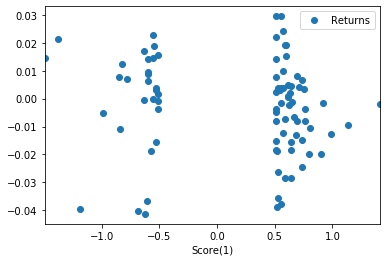

In [33]:
#Step 5: Test for predictive value 
#plot our data and visualise it
gm3.plot(x='Score(1)', y= 'Returns',style='o')

In [54]:
gm3['Returns'].corr(gm3['Score(1)'])

-0.11549480335771828